# Analysis of final results

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import myscripts.helper as H
import myscripts.myplot as P

import myscripts.tools as tools

# matplotlib settings
SAVE = False
plt.style.use("/Users/sst/visual.mplstyle")

savefig = H.set_savefig(savedir="/Users/sst/project/papers/19st_tio2b/figure")

def readDF():
    """read metadata of analysis."""
    return pd.read_csv("data_info.csv", index_col=0)

DF = readDF()

pd.set_option('float_format', '{:.3f}'.format)

## Results of the characteristic function fitting

In [3]:
res = H.join_result(DF["csv_twop"], column_names=DF.index.to_list())
res = res.iloc[3:6, :]
res = res.rename({'frac_1' : r'$\gamma$', 'psize_1' : r'psize$_1$($\AA$)', 'psize_2' : r'psize$_2$($\AA$)'})
res

,JBNP31,JBNP32L,JBNP32,JBNP33L,JBNP33
$\gamma$,0.302,0.562,0.469,0.341,0.298
psize$_1$($\AA$),22.822,24.806,20.593,32.613,31.851
psize$_2$($\AA$),48.242,46.597,45.435,58.292,56.890


In [4]:
H.to_latex(res)

\begin{table}[htb]
\caption{}
\label{tab:}
\begin{tabular}{lrrrrr}
\hline\hline
{} &  JBNP31 &  JBNP32L &  JBNP32 &  JBNP33L &  JBNP33 \\
\hline
$\gamma$         &   0.302 &    0.562 &   0.469 &    0.341 &   0.298 \\
psize$_1$($\AA$) &  22.822 &   24.806 &  20.593 &   32.613 &  31.851 \\
psize$_2$($\AA$) &  48.242 &   46.597 &  45.435 &   58.292 &  56.890 \\
\hline\hline
\end{tabular}
\end{table}


## Final Results

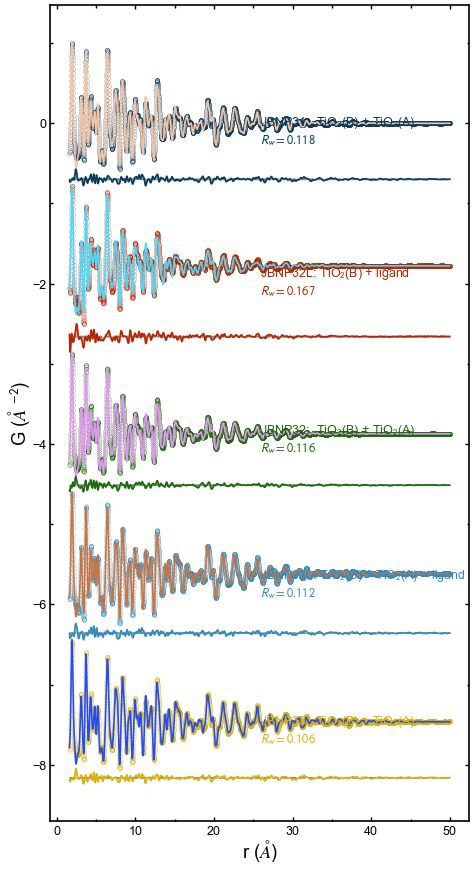

In [9]:
names = [r"JBNP31:  TiO$_2$(B) + TiO$_2$(A)",
         r"JBNP32L: TiO$_2$(B) + ligand",
         r"JBNP32:  TiO$_2$(B) + TiO$_2$(A)",
         r"JBNP33L: TiO$_2$(B) + TiO$_2$(A) + ligand",
         r"JBNP33:  TiO$_2$(B) + TiO$_2$(A)"]
plt.figure(figsize=(9, 18))
P.plot_fgr(DF["final_fgr"], colors=DF["color"], names=names, normal=True, auto_rw=True, apos=(.5, .3))
plt.show()

## load result

In [40]:
RES = pd.read_csv("result.csv", index_col=0)
RES.drop(index=["chi2", "rchi2"], inplace=True)
RES.head()

,JBNP31,JBNP32L,JBNP32,JBNP33L,JBNP33
Rw,0.118,0.167,0.116,0.112,0.106
frac_b1,0.342,0.571,0.498,0.328,0.288
psize_Bronze_1,21.937,25.469,19.295,26.817,21.402
psize_Bronze_2,48.135,46.288,44.776,56.844,55.133
scale_Bronze,0.537,0.248,0.519,0.386,0.512


In [41]:
dct =  {'Rw':r'$R_w$',
        'frac_b1':r'$\gamma$',
        'psize_Bronze_1':r'psize$_{Bronze}^{(1)}$($\AA$)',
        'psize_Bronze_2':r'psize$_{Bronze}^{(2)}$($\AA$)',
        'scale_Bronze':r'scale$_{Bronze}$',
        'delta2_Bronze':r'$\delta_{Bronze}^{2}$($\AA^{2}$)',
        'a_Bronze':r'a$_{Bronze}$($\AA$)',
        'b_Bronze':r'b$_{Bronze}$($\AA$)',
        'c_Bronze':r'c$_{Bronze}$($\AA$)',
        'beta_Bronze':r'$\beta_{Bronze}$(deg)',
        'U33_0_Bronze':r'$U^{33}_{Bronze}(Ti^{(1)})$($\AA^{2}$)',
        'U13_0_Bronze':r'$U^{13}_{Bronze}(Ti^{(1)})$($\AA^{2}$)',
        'U11_0_Bronze':r'$U^{11}_{Bronze}(Ti^{(1)})$($\AA^{2}$)',
        'U22_0_Bronze':r'$U^{22}_{Bronze}(Ti^{(1)})$($\AA^{2}$)',
        'U33_4_Bronze':r'$U^{33}_{Bronze}(Ti^{(2)})$($\AA^{2}$)',
        'U13_4_Bronze':r'$U^{13}_{Bronze}(Ti^{(2)})$($\AA^{2}$)',
        'U11_4_Bronze':r'$U^{11}_{Bronze}(Ti^{(2)})$($\AA^{2}$)',
        'U22_4_Bronze':r'$U^{22}_{Bronze}(Ti^{(2)})$($\AA^{2}$)',
        'U33_8_Bronze':r'$U^{33}_{Bronze}(O^{(1)})$($\AA^{2}$)',
        'U13_8_Bronze':r'$U^{13}_{Bronze}(O^{(1)})$($\AA^{2}$)',
        'U11_8_Bronze':r'$U^{11}_{Bronze}(O^{(1)})$($\AA^{2}$)',
        'U22_8_Bronze':r'$U^{22}_{Bronze}(O^{(1)})$($\AA^{2}$)',
        'U33_12_Bronze':r'$U^{33}_{Bronze}(O^{(2)})$($\AA^{2}$)',
        'U13_12_Bronze':r'$U^{13}_{Bronze}(O^{(2)})$($\AA^{2}$)',
        'U11_12_Bronze':r'$U^{11}_{Bronze}(O^{(2)})$($\AA^{2}$)',
        'U22_12_Bronze':r'$U^{22}_{Bronze}(O^{(2)})$($\AA^{2}$)',
        'U33_16_Bronze':r'$U^{33}_{Bronze}(O^{(3)})$($\AA^{2}$)',
        'U13_16_Bronze':r'$U^{13}_{Bronze}(O^{(3)})$($\AA^{2}$)',
        'U11_16_Bronze':r'$U^{11}_{Bronze}(O^{(3)})$($\AA^{2}$)',
        'U22_16_Bronze':r'$U^{22}_{Bronze}(O^{(3)})$($\AA^{2}$)',
        'U33_20_Bronze':r'$U^{33}_{Bronze}(O^{(4)})$($\AA^{2}$)',
        'U13_20_Bronze':r'$U^{13}_{Bronze}(O^{(4)})$($\AA^{2}$)',
        'U11_20_Bronze':r'$U^{11}_{Bronze}(O^{(4)})$($\AA^{2}$)',
        'U22_20_Bronze':r'$U^{22}_{Bronze}(O^{(4)})$($\AA^{2}$)',
        'x_0_Bronze':r'$x_{Bronze}(Ti^{(1)})$',
        'z_0_Bronze':r'$z_{Bronze}(Ti^{(1)})$',
        'x_4_Bronze':r'$x_{Bronze}(Ti^{(2)})$',
        'z_4_Bronze':r'$z_{Bronze}(Ti^{(2)})$',
        'x_8_Bronze':r'$x_{Bronze}(O^{(1)})$',
        'z_8_Bronze':r'$z_{Bronze}(O^{(1)})$',
        'x_12_Bronze':r'$x_{Bronze}(O^{(2)})$',
        'z_12_Bronze':r'$z_{Bronze}(O^{(2)})$',
        'x_16_Bronze':r'$x_{Bronze}(O^{(3)})$',
        'z_16_Bronze':r'$z_{Bronze}(O^{(3)})$',
        'x_20_Bronze':r'$x_{Bronze}(O^{(4)})$',
        'z_20_Bronze':r'$z_{Bronze}(O^{(4)})$',
        'psize_Anatase':r'psize$_{Anatase}^{(1)}$($\AA$)',
        'scale_Anatase':r'scale$_{Anatase}$',
        'delta2_Anatase':r'$\delta_{Anatase}^{2}$($\AA^{2}$)',
        'a_Anatase':r'a$_{Anatase}$($\AA$)',
        'c_Anatase':r'c$_{Anatase}$($\AA$)',
        'U11_0_Anatase':r'$U^{11}_{Anatase}(Ti)$($\AA^{2}$)',
        'U33_0_Anatase':r'$U^{33}_{Anatase}(Ti)$($\AA^{2}$)',
        'U11_4_Anatase':r'$U^{11}_{Anatase}(O)$($\AA^{2}$)',
        'U22_4_Anatase':r'$U^{22}_{Anatase}(O)$($\AA^{2}$)',
        'U33_4_Anatase':r'$U^{33}_{Anatase}(O)$($\AA^{2}$)', 
        'z_4_Anatase':r'$z_{Anatase}(O)$',
        'wl':r'$\lambda_{ligand}$($\AA$)',
        'amp':r'$\alpha_{ligand}$',
        'dec':r'$\beta_{ligand}$',
        'x0':r'$r_{0ligand}$'}

In [42]:
if SAVE:
    lab = "fitting_result"
    cap = "Fitting results from optimal models."
    H.to_latex(RES.rename(index=dct), caption=cap, label=lab)

## impurity precentage

In [43]:
IMP = RES.loc[["scale_Bronze", "scale_Anatase"], :]
IMP

,JBNP31,JBNP32L,JBNP32,JBNP33L,JBNP33
scale_Bronze,0.537,0.248,0.519,0.386,0.512
scale_Anatase,0.019,nan,0.022,0.044,0.050


In [44]:
imp_frac = IMP.iloc[1] / (IMP.iloc[0] + IMP.iloc[1])
imp_frac = imp_frac.apply(lambda x: f"{x:.1%}" if not np.isnan(x) else r"N/A")
imp_frac = imp_frac.to_frame(name=r"impurity%").T
imp_frac

,JBNP31,JBNP32L,JBNP32,JBNP33L,JBNP33
impurity%,3.5%,N/A,4.1%,10.2%,8.9%


In [45]:
if SAVE:
    lab = "precentage_of_impurity"
    cap = "Percentage of impurity. The estimation is based on the scale factors from two-phase fitting results."+\
    "There is no result applicable to JBNP32L because the two-phase fitting fails for its PDF."
    H.to_latex(imp_frac, label=lab, caption=cap)

## characteristic function

In [46]:
cha_index = ["frac_b1", "psize_Bronze_1", "psize_Bronze_2"]
CHA = RES.loc[cha_index, :]
CHA

,JBNP31,JBNP32L,JBNP32,JBNP33L,JBNP33
frac_b1,0.342,0.571,0.498,0.328,0.288
psize_Bronze_1,21.937,25.469,19.295,26.817,21.402
psize_Bronze_2,48.135,46.288,44.776,56.844,55.133


In [47]:
import diffpy.srfit.pdf.characteristicfunctions as F


def cha_func(x, params):
    a = params.frac_b1
    f1 = F.sphericalCF(x, params.psize_Bronze_1)
    f2 = F.sphericalCF(x, params.psize_Bronze_2)
    return a * f1 + (1 - a) * f2

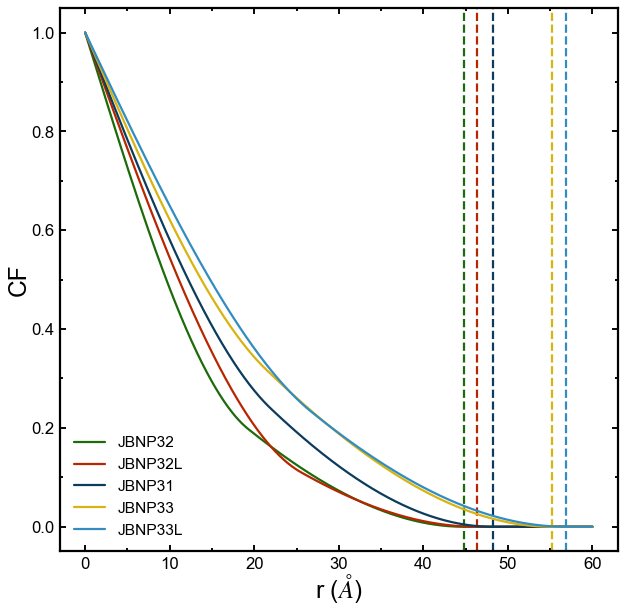

In [48]:
fig = plt.figure()
plt.xlabel(r"r ($\AA$)")
plt.ylabel(r"CF")

datalist = []
for sample, params in CHA.iteritems():
    data = {}
    data["sample"] = sample
    data["x"] = x = np.arange(0., 60.001, 0.1)
    data["y"] = y = cha_func(x, params)
    data["x0"] = x[np.argmax(y < 1e-12)]
    data["color"] = DF.loc[sample, "color"]
    datalist.append(data)
    
datalist = sorted(datalist, key = lambda data: data["x0"])
    
for data in datalist:
    plt.plot(data["x"], data["y"], label=data["sample"], c=data["color"])
    plt.axvline(data["x0"], ls="--", c=data["color"])

plt.legend(loc=3)
H.config_ax()

if SAVE:
    savefig("characteristic_functions")

plt.show()

## lattice constants

In [49]:
LAT = RES.loc[["a_Bronze", "b_Bronze", "c_Bronze"]]
LAT

,JBNP31,JBNP32L,JBNP32,JBNP33L,JBNP33
a_Bronze,12.185,12.220,12.188,12.181,12.186
b_Bronze,3.745,3.758,3.747,3.750,3.747
c_Bronze,6.496,6.468,6.493,6.492,6.502


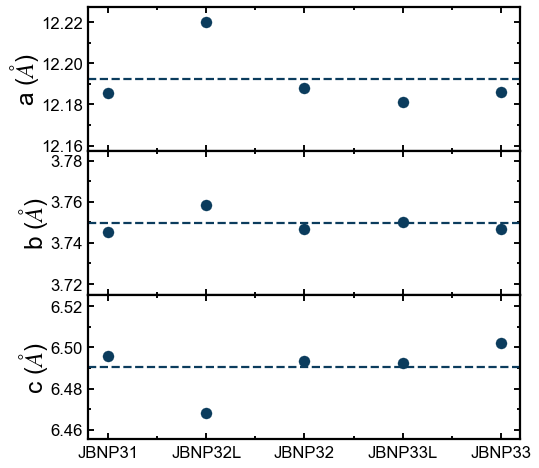

In [50]:
fig = plt.figure()
axs = []
for n, (param, data) in enumerate(LAT.iterrows()):
    ax = plt.axes([0.2, 0.6 - n * 0.2, 0.6, 0.2])
    ax.plot(data, "o", ms=10.)
    
    mean = data.mean()
    ax.axhline(mean, ls="--")
    ax.set_ylim(mean - 0.035, mean + 0.035)
    
    lat = param.split("_")[0]
    ylabel = rf"{lat} ($\AA$)"
    ax.set_ylabel(ylabel)
    H.config_ax()
    axs.append(ax)

for ax in axs[:-1]:
    ax.set_xticklabels([])
    
if SAVE:
    savefig("lattice_constants")

## ADP

In [51]:
is_adp = [re.match("U\d\d.*Bronze", param) is not None for param in RES.index]
ADP = RES[is_adp]
ADP

,JBNP31,JBNP32L,JBNP32,JBNP33L,JBNP33
U33_0_Bronze,0.006,0.009,0.008,0.006,0.006
U13_0_Bronze,0.002,0.003,0.002,0.002,0.002
U11_0_Bronze,0.006,0.009,0.008,0.006,0.006
U22_0_Bronze,0.006,0.009,0.008,0.006,0.006
U33_4_Bronze,0.007,0.008,0.007,0.007,0.006
U13_4_Bronze,0.002,0.002,0.002,0.002,0.002
U11_4_Bronze,0.007,0.008,0.007,0.007,0.006
U22_4_Bronze,0.007,0.008,0.007,0.007,0.006
U33_8_Bronze,0.026,0.021,0.031,0.025,0.024
U13_8_Bronze,0.008,0.006,0.009,0.007,0.007


In [52]:
is_diag = ["U11" in param or "U22" in param or "U33" in param for param in ADP.index]
diagADP = ADP[is_diag]
diagADP

,JBNP31,JBNP32L,JBNP32,JBNP33L,JBNP33
U33_0_Bronze,0.006,0.009,0.008,0.006,0.006
U11_0_Bronze,0.006,0.009,0.008,0.006,0.006
U22_0_Bronze,0.006,0.009,0.008,0.006,0.006
U33_4_Bronze,0.007,0.008,0.007,0.007,0.006
U11_4_Bronze,0.007,0.008,0.007,0.007,0.006
U22_4_Bronze,0.007,0.008,0.007,0.007,0.006
U33_8_Bronze,0.026,0.021,0.031,0.025,0.024
U11_8_Bronze,0.026,0.021,0.031,0.025,0.024
U22_8_Bronze,0.026,0.021,0.031,0.025,0.024
U33_12_Bronze,0.024,0.011,0.027,0.020,0.022


In [53]:
atoms = ['Ti1', 'Ti1', 'Ti1', 'Ti1', 'Ti2', 'Ti2', 'Ti2', 'Ti2', 'O1', 'O1', 'O1', 'O1', 'O2', 'O2', 'O2', 'O2', 'O3', 'O3', 'O3', 'O3', 'O4', 'O4', 'O4', 'O4']

srs = []
for n in range(0, len(diagADP.index), 3):
    sr = diagADP.iloc[n:n+3].mean()
    index = diagADP.index[n]
    atom_ind = int(index.split("_")[1])
    sr.name = atoms[atom_ind]
    srs.append(sr)
grouped_ADP = pd.concat(srs, axis=1).T
grouped_ADP

,JBNP31,JBNP32L,JBNP32,JBNP33L,JBNP33
Ti1,0.006,0.009,0.008,0.006,0.006
Ti2,0.007,0.008,0.007,0.007,0.006
O1,0.026,0.021,0.031,0.025,0.024
O2,0.024,0.011,0.027,0.020,0.022
O3,0.014,0.024,0.013,0.015,0.013
O4,0.013,0.012,0.013,0.013,0.014


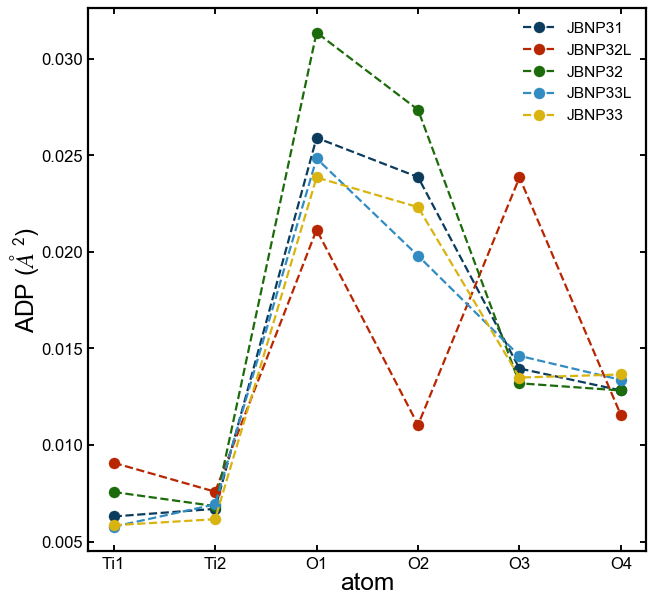

In [54]:
plt.xlabel("atom")
plt.ylabel("ADP ($\AA^2$)")
for sample, col in grouped_ADP.iteritems():
    plt.plot(col, "o--", ms=10., label=sample)
plt.legend()

if SAVE:
    savefig("atom_adps")
    
plt.show()

In [55]:
mean_adp = grouped_ADP.mean()
mean_adp = mean_adp.apply(lambda x: f"{x:.4f}")
mean_adp = mean_adp.to_frame(name=r"mean ADP (\AA^{2})").T
mean_adp

,JBNP31,JBNP32L,JBNP32,JBNP33L,JBNP33
mean ADP (\AA^{2}),0.0149,0.0140,0.0165,0.0142,0.0142


In [56]:
if False:
    H.to_latex(mean_adp, label="mean_adps", caption=r"Average ADPs for all atoms in TiO$_2$(bronze).")

## Supplimentary

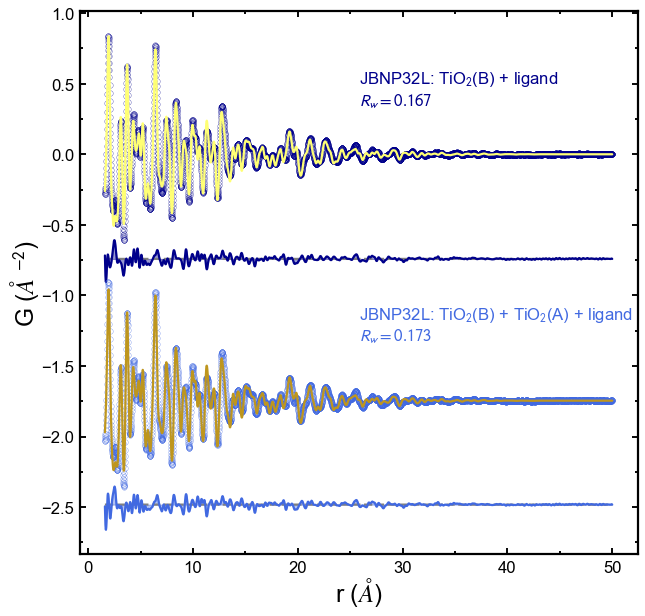

In [57]:
fgrs = DF.loc["JBNP32L", ["fgr_sinwave", "fgr_two_phase_sine_wave"]]
names = [r"JBNP32L: TiO$_2$(B) + ligand", r"JBNP32L: TiO$_2$(B) + TiO$_2$(A) + ligand"]
colors = ["darkblue", "royalblue"]
P.plot_fgr(fgrs, auto_rw=True, names=names, apos=(.5, .3), colors=colors)

if SAVE:
    savefig("no_anatase_in_JBNP32L")

plt.show()

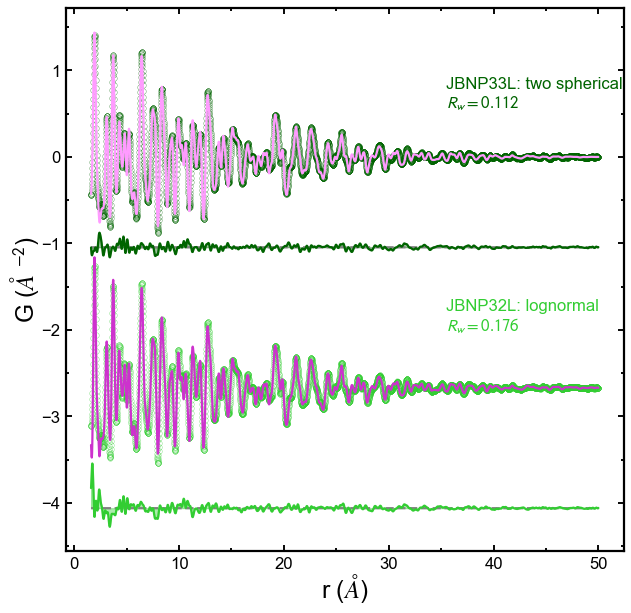

In [58]:
fgrs = DF.loc["JBNP33L", ["fgr_two_phase_sine_wave", "fgr_two_phase_logsp"]]
names = [r"JBNP33L: two spherical", r"JBNP32L: lognormal"]
colors = ["darkgreen", "limegreen"]
P.plot_fgr(fgrs, auto_rw=True, names=names, apos=(.7, .3), colors=colors)

if SAVE:
    savefig("not_use_lognormal")

plt.show()

In [59]:
def get_rw_from_csv(col: str) -> list:
    return [pd.read_csv(csv, index_col=0).iloc[0, 0] for csv in DF[col]]

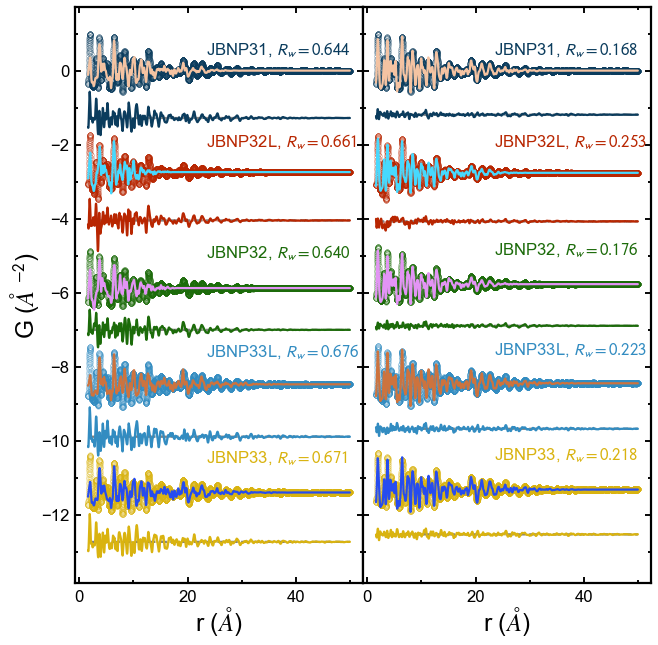

In [60]:
names = DF.index.to_list()
colors = DF["color"]

ax0 = plt.axes([.1, .1, .4, .8])

rws = get_rw_from_csv("csv0")
P.plot_fgr(DF["fgr0"], normal=True, names=names, apos=(.45, .3), rws=rws, rwpos=", ", colors=colors)



ax1 = plt.axes([.5, .1, .4, .8])
rws = get_rw_from_csv("csv1")
P.plot_fgr(DF["fgr1"], normal=True, names=names, apos=(.45, .3), spacing=0.45, rws=rws, rwpos=", ", colors=colors)
ax1.set_ylim(ax0.get_ylim())
ax1.set_yticklabels([])
ax1.set_ylabel(None)

if SAVE:
    savefig("why_free_positions")

plt.show()